In [1]:
import numpy as np
import pandas as pd
import find_split as fs
import evaluation as ev
import matplotlib.pyplot as plt
import trees

In [2]:
data = np.loadtxt('noisy_dataset.txt')
print(data[:5])

[[-59. -53. -51. -54. -45. -79. -87.   4.]
 [-66. -53. -59. -62. -69. -81. -79.   1.]
 [-41. -57. -63. -40. -73. -66. -65.   2.]
 [-62. -58. -52. -63. -50. -87. -88.   4.]
 [-63. -58. -64. -67. -74. -87. -87.   4.]]


In [3]:
#training the tree
decisionTree=trees.binarySearchTree(data)
print('Max depth is',decisionTree.get_max_depth())

Max depth is 18


In [4]:
#just to test, predict the entire training set's labels
train_pred=decisionTree.predict(data[:,:-1])
train_pred

array([4, 1, 2, ..., 1, 3, 3])

In [5]:
#actual labels
data[:,-1]

array([4., 1., 2., ..., 1., 3., 3.])

In [6]:
#check if every label predicted is same as actual label and hence our model is working perfectly
print(np.all(train_pred==data[:,-1]))

True


---RESULT METRICS---
Precisions:   [1. 1. 1. 1.]
Recalls:      [1. 1. 1. 1.]
F1 Score:     [1. 1. 1. 1.]
Avg Accuracy: 1.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


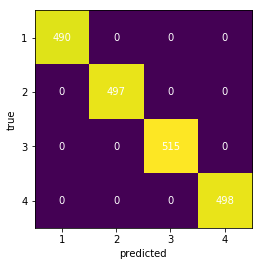

In [7]:
cm=ev.confusion_matrix(data[:,-1],train_pred,plot=True)
i=ev.get_metrics(data[:,-1], train_pred, printout=True)

In [8]:
#testing a training set and test set using a 70:30 split
data2=data.copy()
#shuffle data
np.random.shuffle(data2)
split=0.7
train=data2[:int(len(data2)*split)]
test=data2[int(len(data2)*split):]

model=trees.binarySearchTree(train)
print('Max depth is',model.get_max_depth())

Max depth is 16


In [9]:
#get prediction
y_pred=model.predict(test[:,:-1])

---RESULT METRICS---
Precisions:   [0.76642336 0.82467532 0.82236842 0.82165605]
Recalls:      [0.75539568 0.8089172  0.83333333 0.83766234]
F1 Score:     [0.76086957 0.81672026 0.82781457 0.82958199]
Avg Accuracy: 0.81


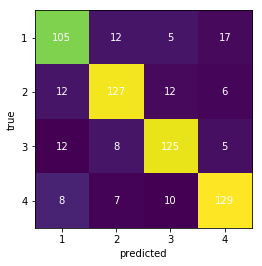

In [10]:
#evaluate
cm=ev.confusion_matrix(test[:,-1],y_pred,plot=True)
i=ev.get_metrics(test[:,-1], y_pred, printout=True)

In [11]:
#testing the limit 
data2=data.copy()
#shuffle data
np.random.shuffle(data2)
split=0.7
train=data2[:int(len(data2)*split)]
test=data2[int(len(data2)*split):]

model2=trees.binarySearchTree(train,limit=4)
print('Max depth is',model2.get_max_depth())

Max depth is 4


---RESULT METRICS---
Precisions:   [0.87969925 0.91194969 0.90322581 0.89542484]
Recalls:      [0.87969925 0.90062112 0.92105263 0.88961039]
F1 Score:     [0.87969925 0.90625    0.91205212 0.89250814]
Avg Accuracy: 0.8983333333333333


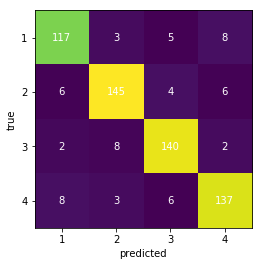

In [12]:
y_pred=model2.predict(test[:,:-1])
cm=ev.confusion_matrix(test[:,-1],y_pred,plot=True)
i=ev.get_metrics(test[:,-1], y_pred, printout=True)